In [ ]:
!pip install pyLDAvis

In [ ]:
import time

In [ ]:
!pip install import-ipynb
import import_ipynb

In [ ]:
from dataset import Dataset
from data_cleaning import Data_Cleaning
from data_preprocessing import Data_Preprocessing
from utils import *

importing Jupyter notebook from dataset.ipynb
importing Jupyter notebook from data_cleaning.ipynb
importing Jupyter notebook from data_preprocessing.ipynb
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
importing Jupyter notebook from utils.ipynb


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Read the Data

In [ ]:
# mount drive to read dataset from it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Pubmed5k.xlsx"

In [ ]:
#init a constructor from Dataset class
ds = Dataset(path)
# read the entire original dataset
dataset = ds.read_data()
print(dataset.shape)

(4999, 3)


In [ ]:
dataset.head(2)

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...


In [ ]:
# set only the column which contain the texts ( here it is "Abstract")
remove_columns_list=['ArticleID', 'Title']
texts = ds.get_text_column(dataset, remove_columns_list)

In [ ]:
texts.head(2)

,Abstract
0,Coordination variability (CV) is commonly anal...
1,Clinical Scenario: Dynamic knee valgus (DKV) i...


In [ ]:
#convert dataframe into list
texts = texts.Abstract.values.tolist()

In [ ]:
# see the first document text from the dataset
texts[0]

'Coordination variability (CV) is commonly analyzed to understand dynamical qualities of human locomotion. The purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb CV during overground locomotion. Three-dimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running. Stance phase CV was calculated for 9 segment and joint couplings using a modified vector coding technique. The number of trials required to achieve a CV mean within 10% of 20 strides average was determined for each coupling and individual. The statistical outputs of mode (walking vs running) and speed (preferred vs fixed) were compared when informed by differing numbers of trials. A minimum of 11 trials were required for stable mean stance phase CV. With fewer than 11 trials, CV was underestimated and led to an oversight of significant differences between 

## Hint: to use the whole dataset, just skip the below cell (don't run it)

In [ ]:
# take only 100 doc to reduce the program time 
# texts = texts[:100]

# Data Cleaning

### cleaning the dataset through:
1. Convert text to lower case
2. remove any newline or tabs
3. remove any email format, to be sure that it will not affect on produced topics keywords
4. remove punctuations

In [ ]:
#init a constructor from Data_cleaning class to clean the data
dc = Data_Cleaning(texts)

In [ ]:
clean_texts = dc.clean_dataset()

In [ ]:
clean_texts[:1]

['coordination variability cv is commonly analyzed to understand dynamical qualities of human locomotion the purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb cv during overground locomotion threedimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running stance phase cv was calculated for 9 segment and joint couplings using a modified vector coding technique the number of trials required to achieve a cv mean within 10 of 20 strides average was determined for each coupling and individual the statistical outputs of mode walking vs running and speed preferred vs fixed were compared when informed by differing numbers of trials a minimum of 11 trials were required for stable mean stance phase cv with fewer than 11 trials cv was underestimated and led to an oversight of significant differences between mode and speed 

## Here it is clear that big part of the dataset is related to medical field

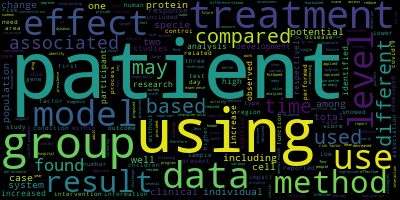

In [ ]:
## see he most repeated (common) 1000 word in the dataset
get_most_common_words(clean_texts)

# Data Preprocessing

1. apply tokenizaion
2. remove stop words
3. apply lemmatization
4. create adictionary to give every unique word a unique id
5. create a corpus to count he number of rebeating each unique word through out the data (by apply BAG OF WORDS "BoW")





In [ ]:
# init a constructor from Data_Preprocessing class
dp = Data_Preprocessing(clean_texts)

In [ ]:
# preprocessing takes lone time to run on cpu (74 minute)
start = time.time()
lemma_text, dictionary, bow_corpus = dp.preprocessing_dataset()
end = time.time()
print("Preprocessing time: ", str((end-start)/60.0))

Preprocessing time:  74.80763988892237


In [ ]:
print(lemma_text[:1])

[['coordination', 'variability', 'cv', 'commonly', 'analyzed', 'understand', 'dynamical', 'quality', 'human', 'locomotion', 'purpose', 'study', 'develop', 'guideline', 'number', 'trial', 'required', 'inform', 'calculation', 'stable', 'mean', 'lower', 'limb', 'cv', 'overground', 'locomotion', 'threedimensional', 'lower', 'limb', 'kinematics', 'captured', '10', 'recreational', 'runner', 'performing', '20', 'trial', 'preferred', 'fixed', 'speed', 'walking', 'running', 'stance', 'phase', 'cv', 'calculated', '9', 'segment', 'joint', 'coupling', 'using', 'modified', 'vector', 'coding', 'technique', 'number', 'trial', 'required', 'achieve', 'cv', 'mean', 'within', '10', '20', 'stride', 'average', 'determined', 'coupling', 'individual', 'statistical', 'output', 'mode', 'walking', 'v', 'running', 'speed', 'preferred', 'v', 'fixed', 'compared', 'informed', 'differing', 'number', 'trial', 'minimum', '11', 'trial', 'required', 'stable', 'mean', 'stance', 'phase', 'cv', 'fewer', '11', 'trial', 'cv'

In [ ]:
# see the frequency of some words by using the dictionary and the bow_corpus
[[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:1]]

[[('10', 2),
  ('11', 3),
  ('20', 2),
  ('9', 1),
  ('achieve', 1),
  ('analyzed', 1),
  ('approach', 1),
  ('average', 1),
  ('aware', 1),
  ('calculated', 1),
  ('calculation', 1),
  ('captured', 1),
  ('coding', 2),
  ('commonly', 1),
  ('compared', 1),
  ('consequence', 1),
  ('coordination', 1),
  ('coupling', 2),
  ('cv', 7),
  ('determined', 1),
  ('develop', 1),
  ('difference', 1),
  ('differing', 1),
  ('dynamical', 1),
  ('fewer', 1),
  ('finding', 1),
  ('fixed', 2),
  ('future', 1),
  ('guideline', 1),
  ('healthy', 1),
  ('human', 1),
  ('individual', 1),
  ('inform', 1),
  ('informed', 1),
  ('insufficient', 1),
  ('joint', 1),
  ('kinematics', 1),
  ('led', 1),
  ('limb', 2),
  ('locomotion', 3),
  ('lower', 2),
  ('mean', 3),
  ('minimum', 2),
  ('mode', 2),
  ('modified', 1),
  ('notable', 1),
  ('number', 4),
  ('output', 1),
  ('overall', 1),
  ('overground', 2),
  ('oversight', 1),
  ('performing', 1),
  ('phase', 2),
  ('population', 1),
  ('preferred', 2),
  ('p

In [ ]:
# create base model
start = time.time()
lda_model = run_lda_model(dictionary, bow_corpus, 15, 24, 1, 100, 10)
end = time.time()
print("Training time: ", str((end-start)/60.0), " minute/s")
# save the base model
save_model(lda_model, "lda_all_data_model")

In [ ]:
# Print the Keyword in the 15 topics
print(lda_model.print_topics())

[(0, '0.023*"covid19" + 0.023*"infection" + 0.017*"patient" + 0.015*"sarscov2" + 0.014*"virus" + 0.014*"disease" + 0.012*"vaccine" + 0.009*"respiratory" + 0.009*"case" + 0.008*"clinical"'), (1, '0.009*"process" + 0.009*"brain" + 0.007*"medium" + 0.007*"task" + 0.006*"control" + 0.006*"learning" + 0.006*"device" + 0.006*"np" + 0.006*"surface" + 0.005*"activity"'), (2, '0.031*"p" + 0.029*"group" + 0.015*"trial" + 0.014*"outcome" + 0.013*"study" + 0.012*"intervention" + 0.011*"treatment" + 0.010*"exercise" + 0.010*"clinical" + 0.008*"patient"'), (3, '0.028*"specie" + 0.010*"plant" + 0.008*"soil" + 0.007*"new" + 0.007*"food" + 0.006*"fish" + 0.006*"nov" + 0.005*"ecosystem" + 0.005*"genus" + 0.005*"strain"'), (4, '0.049*"patient" + 0.020*"year" + 0.019*"95" + 0.017*"child" + 0.015*"rate" + 0.011*"time" + 0.011*"mortality" + 0.010*"month" + 0.010*"age" + 0.009*"hospital"'), (5, '0.008*"china" + 0.008*"chemical" + 0.007*"effect" + 0.007*"sample" + 0.007*"pollution" + 0.006*"ct" + 0.006*"densi

In [ ]:
# set the topics in lda_top
lda_top = lda_model[bow_corpus]

In [ ]:
#show the tpoics in amore readable format (topic index: topic body)
all_topics = show_model_topics(lda_model)

0: covid19 infection patient sarscov2 virus disease vaccine respiratory case clinical
1: process brain medium task control learning device np surface activity
2: p group trial outcome study intervention treatment exercise clinical patient
3: specie plant soil new food fish nov ecosystem genus strain
4: patient year 95 child rate time mortality month age hospital
5: china chemical effect sample pollution ct density removal using noise
6: cancer expression tumor treatment group level stress rat liver breast
7: cell protein gene mechanism role human disease function activity pathway
8: network image structure model specificity signal sensitivity wound energy speed
9: study risk among factor associated level covid19 health analysis disease
10: health social research intervention service support depression experience public community
11: study result data method used using review system model different
12: model data distribution population country policy user urban cluster reference
13: pa

In [ ]:
# measure the model performance using coherence score
#the higher the better
coherence_score = computer_coherence_score(lda_model, lemma_text, dictionary, 'c_v')
print("model coherence score: ", coherence_score)

model coherence score:  0.4319184364803596


### from the visualization, we can see that there is number of inersections between topics like topics(11,13), topics(15,7,9) and more. hat is not good as we need a model which can provide separate topics without overlappingamong them.
### And it provide the most relevant terms in each topic.

In [ ]:
# visualize topics
visualize_topics(lda_model, dictionary, bow_corpus)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.231687 -0.124426       1        1  16.398720
9      0.228453  0.045704       2        1  14.008097
7      0.076284 -0.142024       3        1   8.550979
10     0.180950 -0.114799       4        1   7.534734
4     -0.000811  0.227179       5        1   6.547294
2      0.076333  0.181615       6        1   6.128216
3     -0.136105 -0.098996       7        1   5.123572
1     -0.101367 -0.145020       8        1   4.921697
5     -0.115917 -0.062032       9        1   4.896926
13    -0.038318  0.183953      10        1   4.872652
6     -0.056897  0.094108      11        1   4.828883
14    -0.046005  0.010345      12        1   4.421294
0     -0.072660  0.080709      13        1   4.305268
12    -0.053079 -0.032040      14        1   4.209296
8     -0.172547 -0.104277      15        1   3.252371, topic_info=             Term         Freq        Total Category  logprob  loglift
217       patient  4666.000000  4666.000000  Default  30.0000  30.0000
197        health  2482.000000  2482.000000  Default  29.0000  29.0000
2180       cancer  1241.000000  1241.000000  Default  28.0000  28.0000
71          study  5761.000000  5761.000000  Default  27.0000  27.0000
343             p  1281.000000  1281.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
694    prediction   104.148451   257.148455  Topic15  -5.3517   2.5219
215         model   164.269251  1675.037058  Topic15  -4.8960   1.1037
2168  performance    96.142679   658.821441  Topic15  -5.4316   1.5012
396     detection    88.726618   472.053960  Topic15  -5.5119   1.7543
494          show    78.896288   584.215888  Topic15  -5.6293   1.4236

[838 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2949      6  0.994960   0001
1657      6  0.996922    005
723       1  0.031009      1
723       2  0.137937      1
723       3  0.132591      1
...     ...       ...    ...
245      10  0.046226   year
5177      7  0.995094  yield
2042      5  0.139466      ±
2042      6  0.525490      ±
2042     10  0.333723      ±

[1487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 10, 8, 11, 5, 3, 4, 2, 6, 14, 7, 15, 1, 13, 9])

# Calculate the optimal number of topics
### train set of models with different number of topics, and calculate their coherence score. The model with highest score has the optimal number of topics.
### from the process, we can see that the best model is the model with index 10 and number of topics = 12

In [ ]:
# train multiple models with changing in the numper of topics to get the best fit #topics
# models --> list to train models
# scores --> list of coherence scores (one for each model)
# x --> list to numbers, will be used to plot the #topics later
models, scores, x = compute_coherence_scores(dictionary, bow_corpus, lemma_text, 30, 2, 1)

In [ ]:
# get the maximum coherence score and the index of its model
max_score, indx = get_optimal_topics_num(scores)

# After training many models with hyperparameter tuning, and choosing the best model of them which has the highest coherence score. The best model has coherence score = 0.50, while the base model has coherence score = 0.43.


In [ ]:
print("model: ", indx, " has highest coherence score: ",max_score)

model:  10  has highest coherence score:  0.5084839097706784


In [ ]:
# Print the coherence scores
for m, cs in zip(x, scores):
    print("#topic: ", m, " coherence score: ", round(cs, 4))

#topic:  2  coherence score:  0.3586
#topic:  3  coherence score:  0.3704
#topic:  4  coherence score:  0.3751
#topic:  5  coherence score:  0.4117
#topic:  6  coherence score:  0.4241
#topic:  7  coherence score:  0.4324
#topic:  8  coherence score:  0.4601
#topic:  9  coherence score:  0.4911
#topic:  10  coherence score:  0.4579
#topic:  11  coherence score:  0.4975
#topic:  12  coherence score:  0.5085
#topic:  13  coherence score:  0.4591
#topic:  14  coherence score:  0.4678
#topic:  15  coherence score:  0.463
#topic:  16  coherence score:  0.4864
#topic:  17  coherence score:  0.4975
#topic:  18  coherence score:  0.4764
#topic:  19  coherence score:  0.4801
#topic:  20  coherence score:  0.483
#topic:  21  coherence score:  0.4668
#topic:  22  coherence score:  0.5008
#topic:  23  coherence score:  0.4673
#topic:  24  coherence score:  0.4795
#topic:  25  coherence score:  0.4938
#topic:  26  coherence score:  0.4891
#topic:  27  coherence score:  0.4611
#topic:  28  coherence

### The optimal number of topics is 12

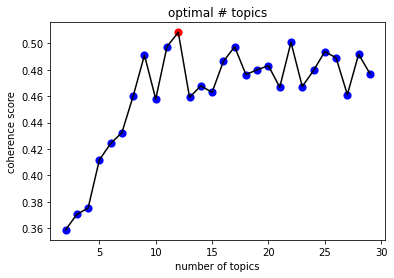

In [ ]:
# plot to focus more on thebest number of topics
plot_num_topics(scores, indx, x)

In [ ]:
# save the best model
better_model = models[indx]
save_model(better_model, "bettter_lda_model")

Model saved...


# From the below visualization, we can see that there is good enhancement on the generated topics. As there are much less number of intersections among topics.

In [ ]:
# visualize topics of the best model
visualize_topics(better_model, dictionary, bow_corpus)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.146364  0.113590       1        1  14.414840
4      0.163371 -0.071985       2        1  14.253709
11     0.062924  0.167859       3        1  12.003556
2      0.140449 -0.119611       4        1  10.812507
8     -0.035785  0.210445       5        1   8.701820
1     -0.037651  0.076106       6        1   7.484625
7      0.026612  0.028721       7        1   7.391676
9      0.104600 -0.199846       8        1   6.966622
0      0.035190 -0.087311       9        1   5.977033
3     -0.163602 -0.008941      10        1   5.662167
10    -0.177490  0.052887      11        1   4.190608
6     -0.264982 -0.161913      12        1   2.140838, topic_info=             Term         Freq        Total Category  logprob  loglift
217       patient  4694.000000  4694.000000  Default  30.0000  30.0000
1284      covid19  1484.000000  1484.000000  Default  29.0000  29.0000
2723       specie  1320.000000  1320.000000  Default  28.0000  28.0000
343             p  1485.000000  1485.000000  Default  27.0000  27.0000
526          cell  1829.000000  1829.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
5097  antioxidant    50.637985   123.539901  Topic12  -5.6546   2.9521
1390       dental    58.316423   202.312402  Topic12  -5.5134   2.6000
65          speed    38.970606    85.216186  Topic12  -5.9165   3.0616
4704     revision    29.028577    35.749841  Topic12  -6.2110   3.6357
712          time    37.188552  1220.971358  Topic12  -5.9633   0.3526

[842 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2949      2  0.224534  0001
2949      8  0.772551  0001
1338      8  0.964462  0002
1657      2  0.104002   005
1657      6  0.031200   005
...     ...       ...   ...
2042      4  0.163063     ±
2042      6  0.024707     ±
2042      8  0.555897     ±
2042     12  0.244595     ±
4943      6  0.993277    µm

[2060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 12, 3, 9, 2, 8, 10, 1, 4, 11, 7])

# Overall evaluation:
#### The baseline model has coherence score= 0.43, and there is many intersections among generated topics.
#### Then, I applied hyperparameter tuning as I trained 28 models with setting topics number (from 2 to 30), and setting the rest of parameter to the following values: Random state = 24, chunk size = 500, pass = 15
#### The best model of them has coherence score = 0.50. So, we have a model with enhancement in its performance with +0.7.
## To improve the model performance more, we can apply following:
- Try train a model many times with different values for the above parameters and alpha.
- Apply n_grams and IFIDF on dataset instead of only BoW.
- Use LDA Mallet model.  Mallet version of lda provide topics with better quality.
